In [1]:
import edward as ed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from edward.models import Normal
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


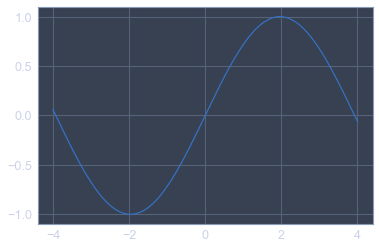

In [4]:
N = 200
x = np.linspace(-4, 4, N)
x_train = np.sin(0.8*x)
plt.plot(x, x_train)

In [33]:
m = Normal(loc=[0.5], scale=[0.2])
X = Normal(loc=tf.tanh(m*x), scale=0.2)

In [34]:
qm = Normal(loc=tf.Variable(tf.random_normal([1])),
           scale=tf.Variable(tf.nn.softplus(tf.ones([1]))))

In [35]:
inference = ed.KLqp({m: qm}, data={X: x_train})

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\edward\util\random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [36]:
inference.run(n_iter=500, n_samples=5)

500/500 [100%] ██████████████████████████████ Elapsed: 4s | Loss: 200.452


In [37]:
x_post = ed.copy(X, {m: qm})

In [38]:
sess = ed.get_session()
x_gen = sess.run(x_post)

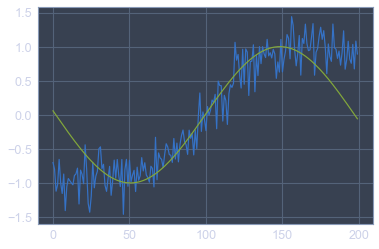

In [39]:
plt.plot(x_gen)
plt.plot(x_train)

In [31]:
mm = qm.sample(100).eval()

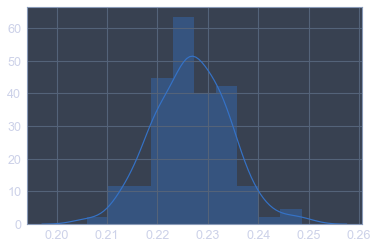

In [32]:
sns.distplot(mm)